In [ ]:
import numpy as np
from numpy.linalg import inv
import math
import itertools
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

In [3]:
#load train data as numpy array
X_train = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw3/data/gaussian_process/X_train.csv',delimiter=',')
y_train = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw3/data/gaussian_process/y_train.csv',delimiter=',')

#load test data as numpy array
X_test = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw3/data/gaussian_process/X_test.csv',delimiter=',')
y_test = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw3/data/gaussian_process/y_test.csv',delimiter=',')

time: 22.7 ms


## 1-A

In [4]:
# kernel matrix
def kernel(X_1, X_2, b):
    k = np.linalg.norm(X_1[None,:,:]-X_2[:,None,:],axis=2)
    return np.exp(-1/b * (k**2))


# Gaussian process
def G_process(X_train, y_train, X_test, b, sigma):
    K_n = kernel(X_train, X_train, b)
    
    I = np.identity(X_train.shape[0])
    c = np.linalg.inv((sigma) * I + K_n)
    
    K_k = kernel(X_test, X_train, b).T
    w = np.dot(K_k, c)
    predict = np.dot(w, y_train)
    
    return predict

time: 14.5 ms


## 1-B

In [5]:
b_list=[5,7,9,11,13,15]
sigma_list=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
c = list(itertools.product(b_list, sigma_list))

y_predict = []
for i in range(len(c)):
    y_predict.append(G_process(X_train, y_train, X_test, c[i][0], c[i][1]))
y_predict = np.array(y_predict)

time: 1.49 s


In [6]:
def RMSE(y_predict, y_test, c):
    rmse = []
    
    for i in range(len(c)):
        a = math.sqrt(np.sum((y_predict[i] - y_test)**2) / 42)
        rmse.append(a)  
    return rmse

time: 4.78 ms


In [11]:
rmse = RMSE(y_predict, y_test, c)
rmse_table = pd.DataFrame(
    {'parameters': c, 'rmse_value': rmse})
rmse_table

,parameters,rmse_value
0,"(5, 0.1)",1.966276
1,"(5, 0.2)",1.933135
2,"(5, 0.3)",1.923420
3,"(5, 0.4)",1.922198
4,"(5, 0.5)",1.924769
5,"(5, 0.6)",1.929213
6,"(5, 0.7)",1.934634
7,"(5, 0.8)",1.940583
8,"(5, 0.9)",1.946820
9,"(5, 1)",1.953213


time: 53.3 ms


## 1-C

In [8]:
rmse_table.ix[rmse_table['rmse_value'].idxmin()]

parameters    (11, 0.1)
rmse_value      1.89051
Name: 30, dtype: object

time: 5.52 ms


The best solution is for b= 11 and sigma = 0.1 with rmse value of 1.89051.

This approach comapring to homework 1 gives lower rmse, therefore we got a more accurate result using Gaussian Process. We can also have confidence intervals for predictions if we calculate covaraince.

However, Gaussian Procecss is computationally more expensive comparing to ridge and polynomial regression specially with large data. therefore there is an issue of scaling. Also it doesnt have a closed form 

## 1-D

/Users/Amiros/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


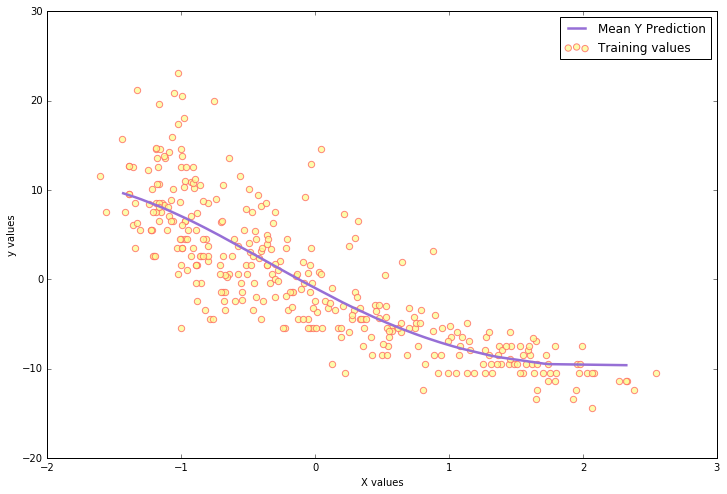

time: 416 ms


In [9]:
#selecting only the 4th feature (car weight)
X_train_car_weight = X_train[:,3].reshape(-1,1)
X_test_car_weight = X_test[:,3].reshape(-1,1)

# predicting based on reshaped data
y_predict_4th = G_process(X_train_car_weight, y_train, X_test_car_weight, 5, 2)

# 
df_4 = pd.DataFrame({'x':X_test_car_weight[:,0], 'y':y_predict_4th.reshape(-1,1)[:,0]})
df_4 = df_4.sort(['x'], ascending=[1])

plt.figure(figsize=(12,8))
plt.scatter(X_train_car_weight, y_train, alpha = '0.8', facecolors='#fdfd96', edgecolors='#ff6961', s = 40)
plt.plot(df_4['x'], df_4['y'], '#966fd6', linewidth = 2.5)

plt.ylabel('y values')
plt.xlabel('X values')

labels = ['Mean Y Prediction', 'Training values']
plt.legend(labels)

# 2

In [ ]:
#load train data as numpy array
X_train0 = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw3/data/boosting/X_train.csv',delimiter=',')
y_train = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw3/data/boosting/y_train.csv',delimiter=',')

#load test data as numpy array
X_test0 = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw3/data/boosting/X_test.csv',delimiter=',')
y_test = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw3/data/boosting/y_test.csv',delimiter=',')

In [ ]:
X_train = np.hstack((X_train0, np.ones((1036,1), dtype=np.int)))
X_test = np.hstack((X_test0, np.ones((1000,1), dtype=np.int)))

In [ ]:
# Least Square classification
def LS(X_train, y_train):
    coef = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
    return coef



# Boosting algorithm
def AdaBoost(X_train, y_train, T):

    # create an index lsit with the size of training data
    index = np.full((X_train.shape[0]), range(0,X_train.shape[0]))

    # initial value
    w = np.full((X_train.shape[0]), 1/X_train.shape[0])    
    B_table = []
    epsilon_list = []
    alpha_list = []
    coef_array = np.empty((0, 6))
    
    for i in range(T):

        # choose random from the index according to the w distribution
        B_index = index[np.random.choice(index.shape[0], index.shape[0], replace=True, p= w)]
        B_table.append(B_index.tolist())

        # bootstrap samples
        B_X = X_train[B_index]
        B_y = y_train[B_index]

        # predict
        coef = LS(B_X, B_y)
        y_pred = np.sign(X_train.dot(coef))
        coef_array = np.append(coef_array, [coef], axis=0)

        # updating weights 
        epsilon = np.multiply((y_train != y_pred), w).sum()
        alpha = 0.5 * np.log((1 - epsilon)/epsilon)
        
        epsilon_list.append(epsilon)
        alpha_list.append(alpha)

        w_est = np.multiply(w, np.exp(-alpha * np.multiply(y_train, y_pred)))
        w = w_est/ w_est.sum()
    return coef_array, B_table, alpha_list, epsilon_list



# function to calculate error for every T
def error(X, y, coef, alpha, T):
    a = np.empty((0,0))
    final = np.empty((X.shape[0], 0))
    error_table = []
    
    for i in range(T):
        a = alpha[i] * np.sign(X.dot(coef[i]))
        final = np.append (final, a.reshape(-1,1), axis = 1)

        pred = np.sign(np.sum(final, axis =1))
        error = (pred != y).sum()/10
        error_table.append(error)

    return error_table

In [ ]:
# running boosting algorithm
coef_array, B_table, alpha_list, epsilon_list = AdaBoost(X_train, y_train, 1500)

# calculating training and testing error
test_error = error(X_test, y_test, coef_array, alpha_list, 1500)
train_error = error(X_train, y_train, coef_array, alpha_list, 1500)

 ## 2 - A

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(test_error, '#779ECB', train_error, '#FF6961')
plt.title('Training and Test error for boosting algorithm')
plt.ylabel('%')
labels = ['Test error', 'Training error']
plt.legend(labels)

## 2-B

In [ ]:
epsilon_array = np.array(epsilon_list)
epsilon = (0.5 - epsilon_array) ** 2

ss = []

for i in range(1,1501):
    s = np.sum(epsilon[0:i])
    ss.append(s)
ss2 = np.array(ss)
ss2 = np.exp(-2 * ss2)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(ss2, '#AEC6CF', linewidth = 2)
plt.title('The upper bound on the training error')
plt.ylabel('%')
plt.xlabel('T')
plt.xlim(-0.1, 1501)

## 2-C

In [ ]:
flattened_B = [val for sublist in B_table for val in sublist]

In [ ]:
plt.figure(figsize=(12,8))

plt.hist(flattened_B, bins='auto', color = '#AEC6CF')
plt.xlim(-.05,1000.05)
plt.title('number of times each training data point was selected by the bootstrap')

## 2-D

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(epsilon_list, '#CFCFC4')
plt.title('Epsilon values over T')
plt.ylabel('Epsilon')
plt.xlabel('T')
plt.xlim(-0.05, 1500.05)
plt.ylim(0, 1)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(alpha_list, '#AEC6CF')
plt.title('Alpha values over T')
plt.ylabel('Alpha')
plt.xlabel('T')
plt.xlim(-0.05, 1500.05)
plt.ylim(-1, 1)